In [2]:
pip install yolov5

Note: you may need to restart the kernel to use updated packages.


In [24]:
#Import the libraries.
import os
import shutil
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import subprocess

In [6]:
#Define data paths.
data_dir = "C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/Data"
output_dir = "C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/DataYolo"
classes = ["buffalo", "elephant", "rhino", "zebra"]

In [8]:
#Generate the train, test, and val folders.
for split in ["test", "train", "val"]:
    os.makedirs(os.path.join(output_dir, "images", split), exist_ok = True)
    os.makedirs(os.path.join(output_dir, "labels", split), exist_ok = True)

In [10]:
#Split images and labels into test, training, and validation folders
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    files = [f for f in os.listdir(class_dir) if f.endswith(".jpg")]
    
    #Split the data. 70% for training, 15% for testing, 15% for validation.
    training, temps = train_test_split(files, test_size = 0.3, random_state = 4) #April is my birth month :D
    validating, testing = train_test_split(temps, test_size = 0.5, random_state = 4)

    for split, split_files in zip(["train", "val", "test"], [training, validating, testing]):
        for img_file in split_files:
            #Changing file names to represent their classes.
            new_img = f"{class_name}_{img_file}"
            new_label = new_img.replace(".jpg", ".txt")
            
            #Copy the images.
            shutil.copy(
                os.path.join(class_dir, img_file),
                os.path.join(output_dir, "images", split, new_img)
            )
            
            #Copy the labels.
            label_file = img_file.replace(".jpg", ".txt")  # Get the label file corresponding to the image
            shutil.copy(
                os.path.join(class_dir, label_file),
                os.path.join(output_dir, "labels", split, new_label)
            )

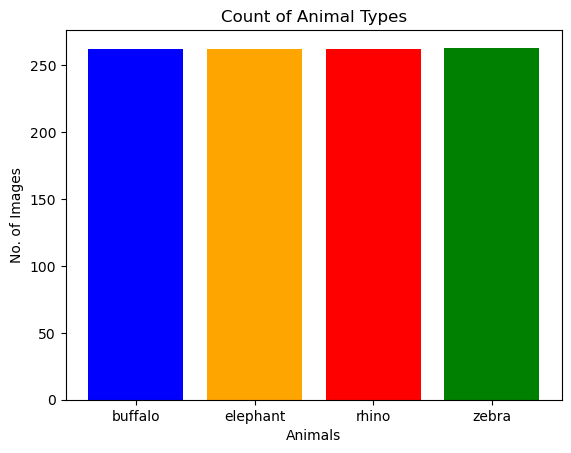

{'buffalo': 262, 'elephant': 262, 'rhino': 262, 'zebra': 263}


In [12]:
#Visualize the number of images in the training set.
animal_category = {}
for class_name in classes:
    train_img_dir = os.path.join(output_dir, "images", "train")
    count = len([f for f in os.listdir(os.path.join(train_img_dir)) if f.startswith(class_name)])
    animal_category[class_name] = count

#Building the bar grapg.
training_colours = ["blue", "orange", "red", "green"]
plt.bar(animal_category.keys(), animal_category.values(), color = training_colours)
plt.title("Count of Animal Types")
plt.xlabel("Animals")
plt.ylabel("No. of Images")
plt.show()

print(animal_category)

In [14]:
#Define the main directories again, this time for the split data.
data_dir = "C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/DataYolo"
output_dir = "C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/DataYolo"

#Define the new directories for train/val/test with the modified data.
training_dir = os.path.join(data_dir, "images", "train")
validation_dir = os.path.join(data_dir, "images", "val")
testing_dir = os.path.join(data_dir, "images", "test")

#Retrieve the number of classes.
classes = ["buffalo", "elephant", "rhino", "zebra"]
class_count = len(classes)

#Turn the text files into .yaml files.

#Create the configuration file.
yaml_content = f"""
train: {training_dir}
val: {validation_dir}
test: {testing_dir}

nc: {class_count}
names: {classes}
"""

#Making sure the output directory exists.
if not os.path.exists(output_dir):
    os.makedirs(output_dir) #Encountered this problem once.

#Define the yaml path and insert the yaml_content into it.
yaml_path = os.path.join(output_dir, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

#Confirming the creaiton of the yaml file.
print(f"YAML file created at: {yaml_path}")

YAML file created at: C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/DataYolo\data.yaml


In [16]:
#Cloning YOLOv5.
#This step exists because of PC problems and incorrect downloads.
yolov5_dir = "C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/yolov5"
if not os.path.exists(yolov5_dir):
    os.system('git clone https://github.com/ultralytics/yolov5.git ' + yolov5_dir)
os.chdir(yolov5_dir)
os.system('pip install -r requirements.txt')

0

In [18]:
#Implementing the path for GIT.exe
#GIT wasn't installed and YOLOv5 had trouble accessing the GIT executable
#when installed therefore this code was implemented. This is a PC-based problem.
os.environ["GIT_PYTHON_GIT_EXECUTABLE"] = "C:/Program Files/Git/cmd/git.exe"

#Setting the path for DataYolo and YAML file again due to error codes.
data_dir = "C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/DataYolo"
yaml_path = os.path.join(data_dir, 'data.yaml')

In [20]:
#Changing the current directory to YOLOv5 for the model.
os.chdir('C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/yolov5')

In [26]:
#Running the model by running the YOLOv5 training script.
command = f'python "C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/yolov5/train.py" --data "{yaml_path}" --epochs 10 --img 640 --batch 16'
result = subprocess.run(command, shell=True, capture_output=True, text=True)

#Print output and errors if there are any.
#Errors printed to gain a better understanding of the problem.
print("stdout:", result.stdout)
print("stderr:", result.stderr)
print("Return code:", result.returncode)

stdout: 
stderr: train: weights=yolov5s.pt, cfg=, data=C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/DataYolo\data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\fiko2\Desktop\CVAI': No such file or directory
YOLOv5  2024-11-3 Python-3.12.7 torch-2.5.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight

In [32]:
#Find the best model weights, in my case, it was in experiment 6.
best_model_path = "C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/yolov5/runs/train/exp6/weights/best.pt"

#Run the model using the test data, using the best model weights.
command_test = f'python "C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/yolov5/val.py" --data "{yaml_path}" --weights "{best_model_path}" --img 640 --task test'
result_test = subprocess.run(command_test, shell=True, capture_output=True, text=True)

#Print the metrics and errors if there are any.
#The errors were implemented as a safety measure.
print("Test Evaluation stdout:", result_test.stdout)
print("Test Evaluation stderr:", result_test.stderr)
print("Test Evaluation return code:", result_test.returncode)

Test Evaluation stdout: 
Test Evaluation stderr: val: data=C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/DataYolo\data.yaml, weights=['C:/Users/fiko2/Desktop/CVAI Projects/CVAI2/yolov5/runs/train/exp6/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
fatal: cannot change to 'C:\Users\fiko2\Desktop\CVAI': No such file or directory
YOLOv5  2024-11-3 Python-3.12.7 torch-2.5.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

test: Scanning C:\Users\fiko2\Desktop\CVAI Projects\CVAI2\DataYolo\labels\test...:   0%|          | 0/228 [00:00<?, ?it/s]
test: Scanning C:\Users\fiko2\Desktop\CVAI Projects\CVAI2\DataYolo\labels\test... 1 images, 0 backgrounds, 0 corrupt:   0%|          | 1/228 [00:05<2